In [28]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [16, 8]
import numpy as np

In [29]:
from examples import ex_params_1 as par

# Dyskretna symulacja procesu

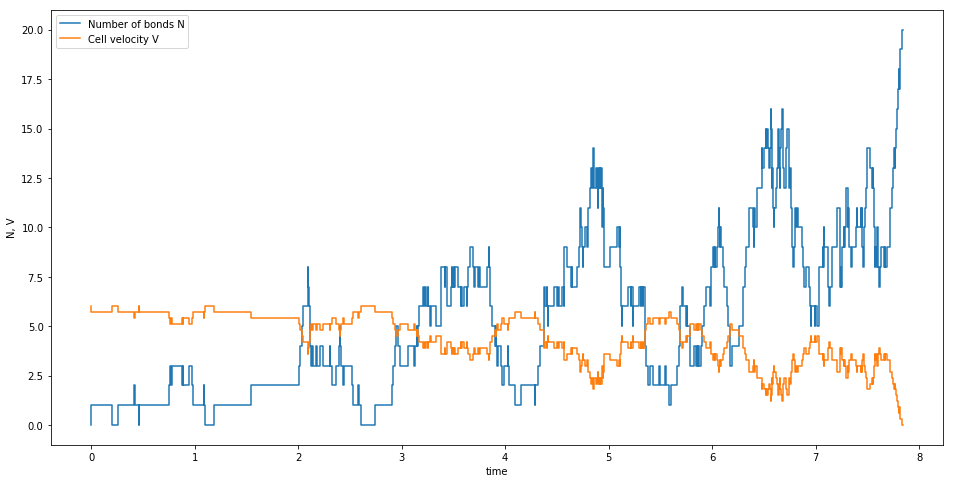

In [37]:
from examples import plot_discrete_simulation

plot_discrete_simulation()

# Ciągła symulacja procesu

In [31]:
from simulations import continuous_sde

In [32]:
MAX_TIME = 10**4
SDE_H = 0.05

### Przykładowy wykres

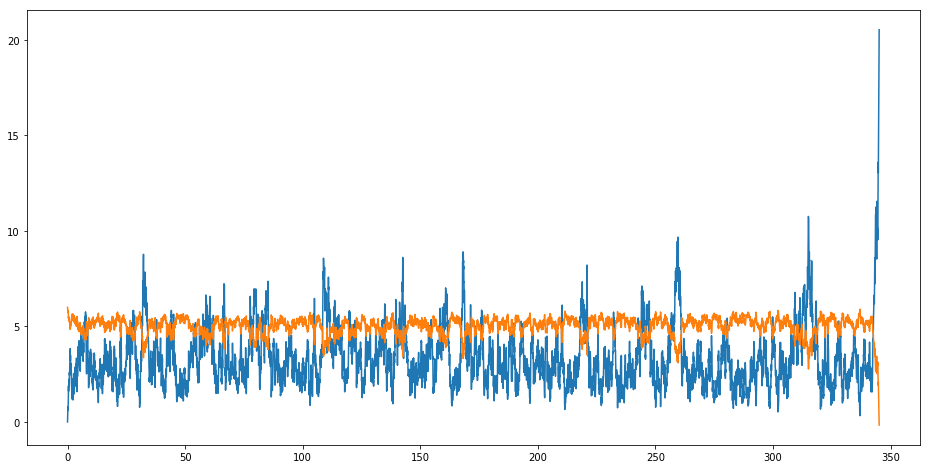

In [35]:
continuous_sde.simulate_and_plot(par, SDE_H)

### Dystrybuanta empiryczna czasów zatrzymania

In [38]:
N_OF_SAMPLES = 10**3
stopping_times = []
not_stopped = 0
for _ in range(N_OF_SAMPLES):
    t, n, u = continuous_sde.simulate(par, SDE_H, MAX_TIME)
    if u[-1] <= 0:
        stopping_times.append(t[-1])
    else:
        not_stopped += 1

In [39]:
not_stopped

0

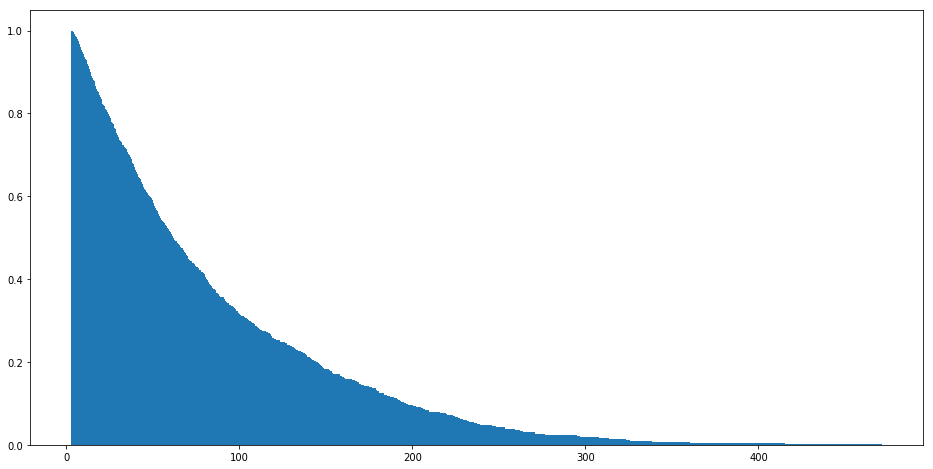

In [40]:
g_0 = list(g[-1, :])
histogram = plt.hist(stopping_times, cumulative=-1, density=True, bins=len(g_0))

In [41]:
hist = histogram[0]

# Rozwiązanie równania na rozkład procesu

In [42]:
from distribution import cdf

Rozwiązujemy równanie cząstkowe na funkcję (1 - dystrybuanta)

In [43]:
g, h = cdf.solve_pde(par, 0.5)

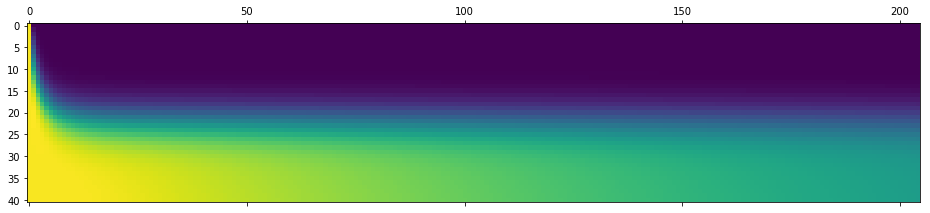

In [44]:
cdf.plot(g)

Intereusje nas przypadek z zerową początkową liczbą wiązań

In [45]:
g_0 = list(g[-1, :])
time = np.linspace(0, (h**2)*(len(g_0)), len(g_0), endpoint=False)

Wartość oczekiwana czasu zatrzymania się limfocytu

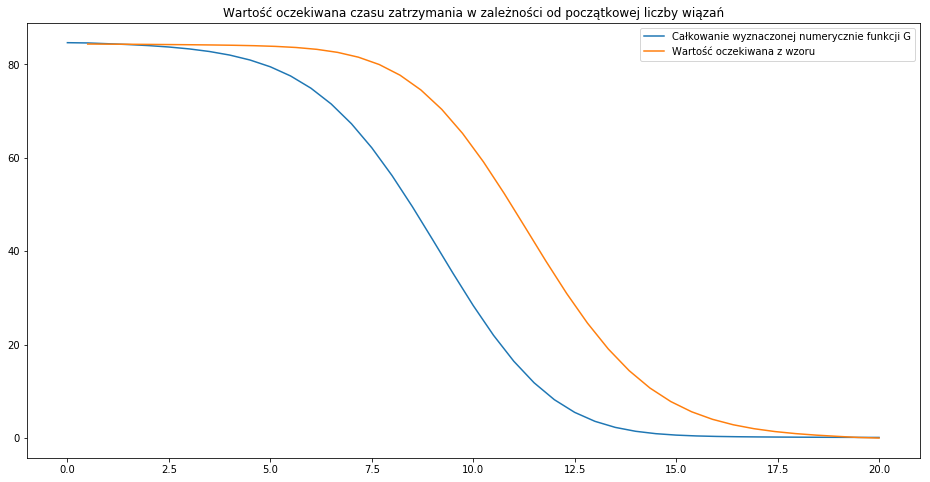

In [46]:
from scipy.integrate import trapz
from distribution.expectation import mean_t
from distribution.integration import expectation_pde

t1 = expectation_pde(g,h)
plt.plot([h * i for i in range(len(t1))], t1, label="Całkowanie wyznaczonej numerycznie funkcji G")
plt.plot(*mean_t(h, par), label="Wartość oczekiwana z wzoru")
plt.title("Wartość oczekiwana czasu zatrzymania w zależności od początkowej liczby wiązań")
ttemp = plt.legend()

# Porównanie wyników symulacji ciągłej i rozwiązania równania

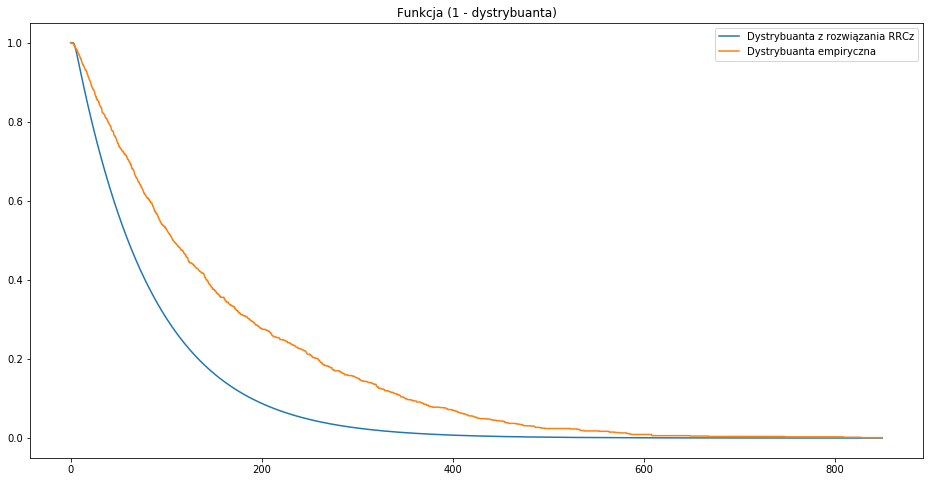

In [47]:
plt.plot(time, g_0, label="Dystrybuanta z rozwiązania RRCz")
plt.plot(time, hist, label="Dystrybuanta empiryczna")
plt.legend()
temp = plt.title("Funkcja (1 - dystrybuanta)")

# Parametr stochastyczny $a$

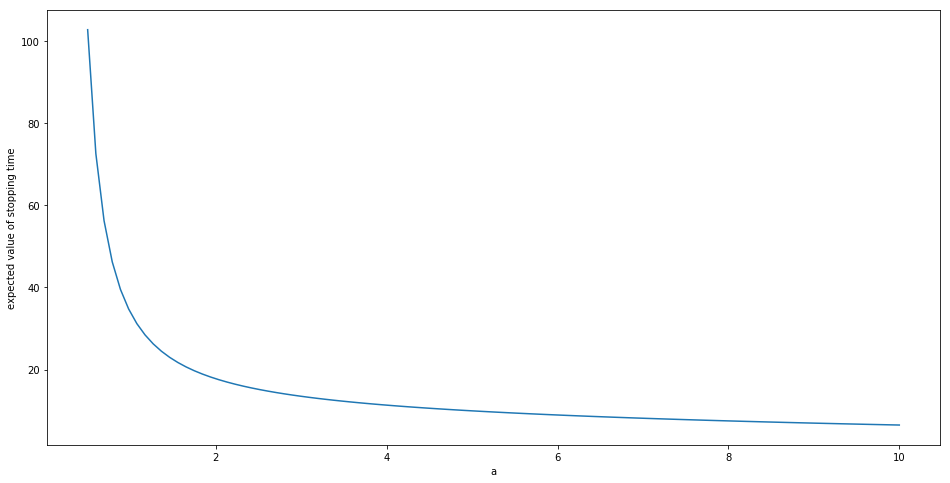

In [48]:
from examples import plot_mean_a
from examples import plot_mean_a_pde

plot_mean_a(100)


In [ ]:
from examples import plot_mean_a_pde

In [ ]:
plot_mean_a_pde(1)